# DeepLearning project model

In [12]:
import tensorflow as tf

In [13]:
import glob
folder_list = glob.glob('/home/computer520/DL_project/data/Training/T_*/*')
folder_list

['/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img',
 '/home/computer520/DL_project/data/Training/T_CAN/T_CAN_img',
 '/home/computer520/DL_project/data/Training/T_PLASTIC/T_PLASTIC_img']

In [14]:
len(folder_list)

3

In [15]:
# 파일 경로 모아두기
file_list = []
for each in folder_list:
    file_list.extend(glob.glob(each+'/*'))

In [16]:
file_list

['/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_24456.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_29909.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_22165.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_26366.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_29432.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_12412.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_15517.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_28488.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_21407.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_34251.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T_GLASS_4022.jpg',
 '/home/computer520/DL_project/data/Training/T_GLASS/T_GLASS_img/T

In [17]:
# label 이름만 따로
label_name = [each.split('/')[-3] for each in file_list]
label_name

['T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_GLASS',
 'T_

In [18]:
len(file_list), len(label_name)

(127820, 127820)

In [19]:
import pandas as pd

file_list_pd = pd.DataFrame({'path':file_list, 'label':label_name})
file_list_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127820 entries, 0 to 127819
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   path    127820 non-null  object
 1   label   127820 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


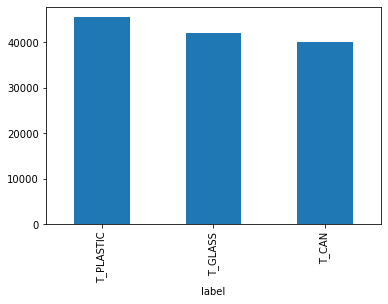

In [20]:
file_list_pd['label'].value_counts().plot.bar();

In [21]:
# TRASH(label) 별로 하나씩 뽑는다.
random_sample = file_list_pd.groupby('label', group_keys=False).apply(lambda x: x.sample(1))
random_sample.head()

,path,label
60665,/home/computer520/DL_project/data/Training/T_C...,T_CAN
23183,/home/computer520/DL_project/data/Training/T_G...,T_GLASS
102158,/home/computer520/DL_project/data/Training/T_P...,T_PLASTIC


In [22]:
import matplotlib.pyplot as plt

def draw_sample_pic_from_file_list(df):
    fig = plt.figure(1, figsize=(24,20))

    cnt =1
    for idx, row in df.iterrows():
        if cnt > len(df): break
        plt.subplot(6,6,cnt)
        cnt +=1
        image = plt.imread(row['path'])
        plt.imshow(image)
        plt.axis('off')
        plt.title(row['label'])
    
    plt.tight_layout()
    plt.show()

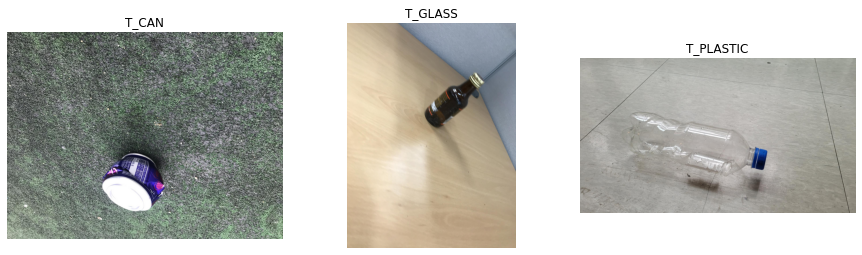

In [23]:
draw_sample_pic_from_file_list(random_sample)

In [24]:
# train / test data 나누기
from sklearn.model_selection import train_test_split

train_data_condi, test_data = train_test_split(file_list_pd,
                                               test_size = 0.3,
                                               stratify = file_list_pd['label'],
                                               random_state=22)

In [25]:
train_data, val_data = train_test_split(train_data_condi, test_size=0.3,
                                        stratify=train_data_condi['label'],
                                        random_state=22)

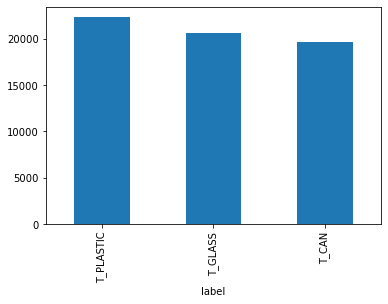

In [26]:
train_data['label'].value_counts().plot.bar();

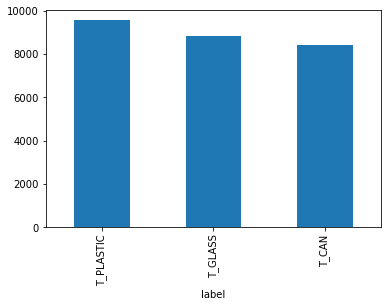

In [27]:
val_data['label'].value_counts().plot.bar();

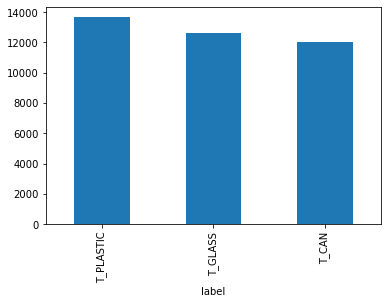

In [28]:
test_data['label'].value_counts().plot.bar();

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255, 
                                    horizontal_flip = True,
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)
train_generator = train_data_gen.flow_from_dataframe(
    dataframe = train_data, 
    target_size = (150,150),
    class_mode = 'categorical',
    x_col = 'path',
    y_col = 'label',
)

Found 62631 validated image filenames belonging to 3 classes.


In [30]:
val_data_gen = ImageDataGenerator(rescale = 1./255)
val_generator = val_data_gen.flow_from_dataframe(
    dataframe = val_data,
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (150,150),
    seed = 13,
    shuffle = False
)

Found 26843 validated image filenames belonging to 3 classes.


In [31]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_data_gen.flow_from_dataframe(
    dataframe = test_data,
    x_col = 'path',
    y_col = 'label',
    class_mode = 'categorical',
    target_size = (150,150),
    seed = 13,
    shuffle = False
    
)

Found 38346 validated image filenames belonging to 3 classes.


In [32]:
# model
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3),
                  padding='same'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),

    layers.Conv2D(64,(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.1),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(len(folder_list), activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

In [33]:
# Compile
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# model training
hist = model.fit(
    train_generator, epochs=22, validation_data = val_generator
)

Epoch 1/22
1958/1958 [==============================] - 2360s 1s/step - loss: 0.8939 - accuracy: 0.5903 - val_loss: 0.7770 - val_accuracy: 0.6595
Epoch 2/22
1958/1958 [==============================] - 1974s 1s/step - loss: 0.7421 - accuracy: 0.6817 - val_loss: 0.6773 - val_accuracy: 0.7145
Epoch 3/22
1958/1958 [==============================] - 2027s 1s/step - loss: 0.6640 - accuracy: 0.7236 - val_loss: 0.6204 - val_accuracy: 0.7467
Epoch 4/22
1958/1958 [==============================] - 1970s 1s/step - loss: 0.6045 - accuracy: 0.7503 - val_loss: 0.5665 - val_accuracy: 0.7700
Epoch 5/22
1958/1958 [==============================] - 1960s 1s/step - loss: 0.5683 - accuracy: 0.7660 - val_loss: 0.5310 - val_accuracy: 0.7873
Epoch 6/22
1958/1958 [==============================] - 1963s 1s/step - loss: 0.5417 - accuracy: 0.7786 - val_loss: 0.5480 - val_accuracy: 0.7774
Epoch 7/22
1958/1958 [==============================] - 1958s 1000ms/step - loss: 0.5195 - accuracy: 0.7868 - val_loss: 0.50

In [30]:
#model save
model.save("model.h5")

#model load
#from tensorflow.keras.models import load_model

In [34]:
#model load
from tensorflow.keras.models import load_model
model = load_model("model.h5")